# An Analytical Study of UC San Diego's Parking Situation

## Introduction and Data Clean-up

It is a common complaint for the undergraduate student population of UC San Diego (particularly on Reddit) to say that there is a problem with the current way that parking works in UC San Diego; while we will not study the way that the admissions at UC San Diego has increased, it comes logically that as more people are admitted to campus, more people will need to get to campus to take classes, and many of those people use cars, necessarily.

The university (UC San Diego) tracks a survey of the availability of their parking spaces per quarter, and we have tasked to use this data to answer a number of questions that may arise from this particular issue.

In particular, we seek to find the best time to arrive, which parking structure may be the best to arrive to, and also compare the parking spots to see how many spaces our undergraduate population has in comparison to graduates (S parking spots vs B parking spots inventory comparison).

Below is the cleaning up of the data sets; we have decided to tidy the data in such a way that helps us work with it generally— we have combined together the data of one year worth of quarters for the 2022-2023 school year.

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.stats.multitest as smt
from scipy.stats import f_oneway

In [ ]:
# data extraction
data_summer = pd.read_excel("data/2022-2023_Summer.xlsx", "Summer 2022 Structures")
data_fall = pd.read_excel("data/2022-2023_Fall.xlsx", "Fall 2022 Structures")
data_winter = pd.read_excel("data/2022-2023_Winter.xlsx", "By Structure")
data_spring = pd.read_excel("data/2022-2023_Spring.xlsx", "ByStructurePivotTable")

In [ ]:
def change_structure(df, start):
    start_index = df[df['Structure'] == start].index[0]
    end_index = df[df['Structure'] == str(start + " Total")].index[0]
    df.loc[start_index:end_index, 'Structure'] = df.loc[start_index:end_index, 'Structure'].fillna(start)

In [ ]:
# summer
# getting the column name
index_column = data_summer.iloc[4, :].tolist()

# exclude the old header
data_summer = data_summer.iloc[5:, :]
data_summer.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_summer, "Athena")
change_structure(data_summer, "Campus Point East")
change_structure(data_summer, "Campus Point West")
change_structure(data_summer, "Gilman")
change_structure(data_summer, "Hopkins")
change_structure(data_summer, "Medical Center Hillcrest")
change_structure(data_summer, "Nuevo West/Vela")
change_structure(data_summer, "Pangea")
change_structure(data_summer, "Scholars")
change_structure(data_summer, "South Parking Structure")
change_structure(data_summer, "Torrey Pines Center North")
data_summer = data_summer.reset_index(drop=True)
# data_summer

In [ ]:
# fall
# getting the column name

index_column = data_fall.iloc[4, :].tolist()

# exclude the old header
data_fall = data_fall.iloc[5:, :]
data_fall.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_fall, "Athena")
change_structure(data_fall, "Campus Point East")
change_structure(data_fall, "Campus Point West")
change_structure(data_fall, "Gilman")
change_structure(data_fall, "Hopkins")
change_structure(data_fall, "Medical Center Hillcrest")
change_structure(data_fall, "Nuevo West/Vela")
change_structure(data_fall, "Pangea")
change_structure(data_fall, "Scholars")
change_structure(data_fall, "South Parking Structure")
change_structure(data_fall, "Torrey Pines Center North")
data_fall = data_fall.reset_index(drop=True)
# data_fall

In [ ]:
# winter
# getting the column name

index_column = data_winter.iloc[3, 1:].tolist()

# exclude the old header
data_winter = data_winter.iloc[4:, 1:]
data_winter.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_winter, "Arbor")
change_structure(data_winter, "Athena")
change_structure(data_winter, "Bachman")
change_structure(data_winter, "Campus Point East")
change_structure(data_winter, "Campus Point West")
change_structure(data_winter, "Gilman")
change_structure(data_winter, "Hopkins")
change_structure(data_winter, "Nuevo West/Vela")
change_structure(data_winter, "Pangea")
change_structure(data_winter, "Scholars")
change_structure(data_winter, "South")
change_structure(data_winter, "Torrey Pines Center North")
change_structure(data_winter, "Torrey Pines Center South")
data_winter = data_winter.reset_index(drop=True)
data_winter = data_winter.drop(columns="Space Subtype")
# data_winter

In [ ]:
# spring
# getting the column name

index_column = data_spring.iloc[1, :].tolist()

# exclude the old header
data_spring = data_spring.iloc[2:, :]
data_spring.columns = ["Structure"] + index_column[1:]

# change nan into structure
change_structure(data_spring, "Arbor")
change_structure(data_spring, "Athena")
change_structure(data_spring, "Bachman")
change_structure(data_spring, "Campus Point East")
change_structure(data_spring, "Campus Point West")
change_structure(data_spring, "Gilman")
change_structure(data_spring, "Hopkins")
change_structure(data_spring, "Nuevo West/Vela")
change_structure(data_spring, "Pangea")
change_structure(data_spring, "Scholars")
change_structure(data_spring, "South")
change_structure(data_spring, "Torrey Pines Center North")
change_structure(data_spring, "Torrey Pines Center South")
data_spring = data_spring.reset_index(drop=True)
# data_spring

In [ ]:
data_fall.loc[:, "quarter"] = "fall"
data_winter.loc[:, "quarter"] = "winter"
data_spring.loc[:, "quarter"] = "spring"
data_summer.loc[:, "quarter"] = "summer"

In [ ]:
data_winter.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']
data_spring.columns = ['Structure', 'SpaceType', 'Sum of Inventory', 'Sum of 8am',
       'Sum of 9am', 'Sum of 10am', 'Sum of 11am', 'Sum of 12pm', 'Sum of 1pm',
       'Sum of 2pm', 'Sum of 3pm', 'Sum of 4pm', 'Sum of 5pm',
       'Min of EmptyCalc', 'Sum of OccupiedCalc', 'Sum of PercentCalc',
       'quarter']

In [ ]:
df = pd.concat([data_fall, data_winter, data_spring, data_summer])
# df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Parking Structure

The first analysis is determining the difference of vacancy rates throughout all parking structures; the vacancy rates being the amount of parking spots available over the parking spots that have been taken at the time marked on the data, or (where $x_t$ is the time at which we are determining the rate, for any parking structure or lot)
$$x_t = \frac{\# \text{Vacant Parking Spots at Time t}}{\# \text{Parking Spots Available}}$$

This rate will help us determine which parking structure seems the most available among all the structures available.

In [ ]:
times = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm']

grouped_structures = df.groupby('Structure').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    grouped_structures[rate_col] = grouped_structures.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    grouped_structures[rate_col] = pd.to_numeric(grouped_structures[rate_col], errors='coerce')

grouped_structures = grouped_structures[~grouped_structures['Structure'].str.contains("Total")]

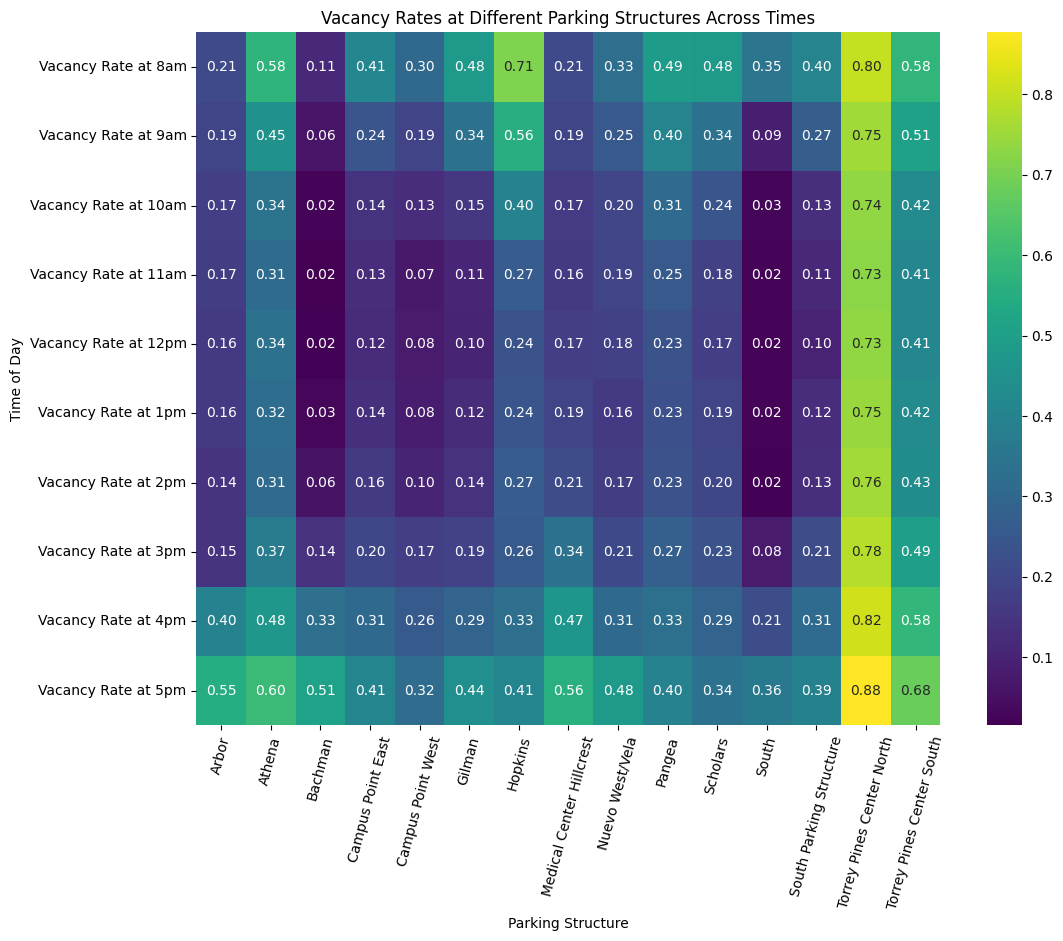

In [ ]:
df_filtered = grouped_structures[grouped_structures['Structure'].notna() & (grouped_structures['Structure'] != '')]

#heatmap of parking vacancies across times vs. parking structures
times_rates = ['Vacancy Rate at 8am', 'Vacancy Rate at 9am', 'Vacancy Rate at 10am', 'Vacancy Rate at 11am', 'Vacancy Rate at 12pm', 'Vacancy Rate at 1pm', 'Vacancy Rate at 2pm', 'Vacancy Rate at 3pm', 'Vacancy Rate at 4pm', 'Vacancy Rate at 5pm']
times_sums = ['Sum of 8am','Sum of 9am','Sum of 10am','Sum of 11am','Sum of 12pm','Sum of 1pm','Sum of 2pm','Sum of 3pm','Sum of 4pm','Sum of 5pm']

vacancy_data_struct = df_filtered.groupby('Structure')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_struct, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates at Different Parking Structures Across Times')
plt.xlabel('Parking Structure')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

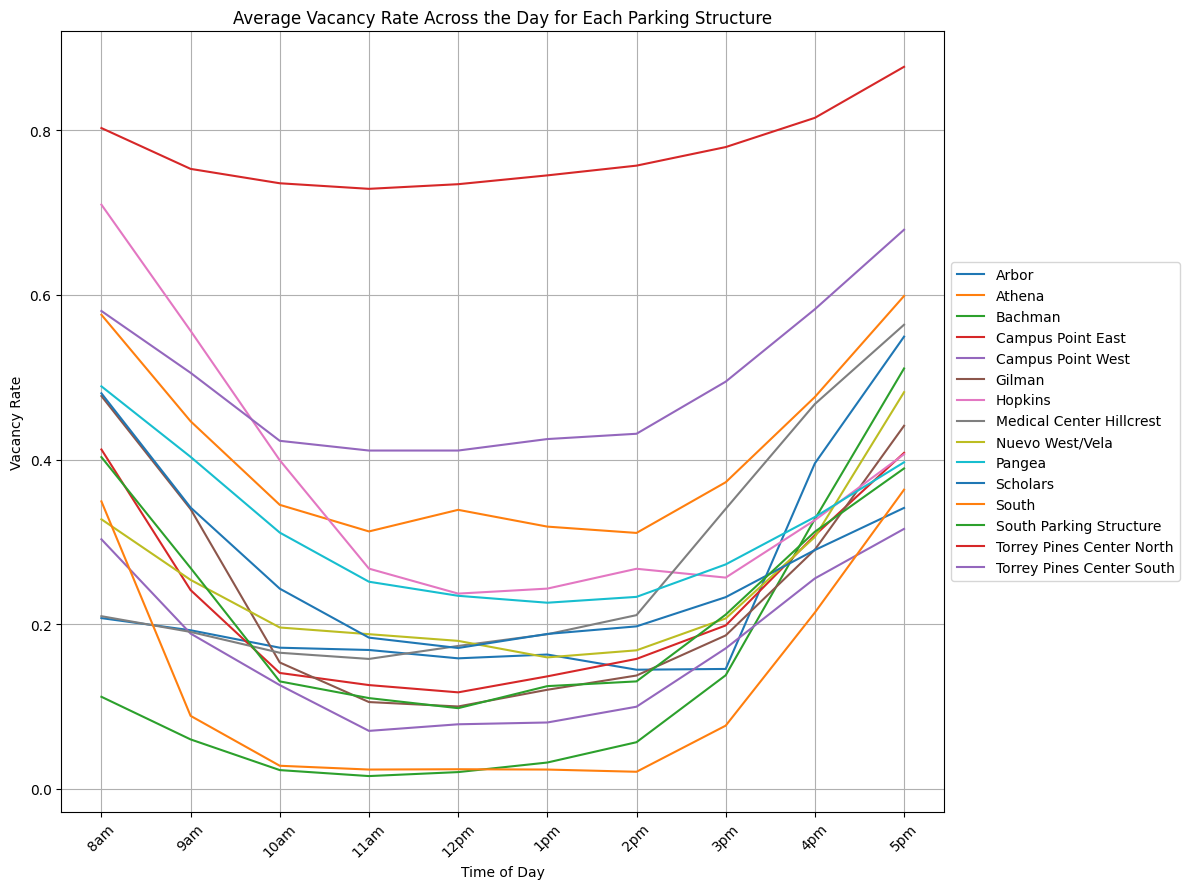

In [ ]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))

for struct in grouped_structures['Structure'].unique():
    df_type2 = grouped_structures[grouped_structures['Structure'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Structure')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

# df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

# df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

# # Plotting the boxplot for occupancy rates at 8 am across structures
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='inferno', hue = "Structure")
# plt.title('Vacancy Rates Across Structures at 8 AM')
# plt.xlabel('Parking Structure')
# plt.ylabel('Vacancy Rate')
# plt.xticks(rotation=75)
# plt.show()

The above data seems to suggest that the vacancy rate of Torrey Pines Center North is higher than the rest of the parking structures, so we get empirically draw the question:

**Question: Is the mean vacancy rate at Torrey Pines Center North significantly higher than the mean vacancy rate at any other parking structure?**

To achieve this, we propose using **Multiple One-sided T-Tests**, where we compare the mean vacancy rate across all times for Torrey Pines Center North with all other structures' mean vacancy rates. We test then, the following null hypothesis with the code that's next:

- Null Hypothesis ($H_0$): The mean vacancy rate is the same across all parking structures.

- Alternate Hypothesis ($H_a$): The mean vacancy rate at Torrey Pines Center North is significantly higher than the mean vacancy rate at any other parking structure.

In [ ]:
structures = ['Arbor', 'Athena', 'Bachman', 'Campus Point East', 'Campus Point West', 'Gilman', 'Hopkins', 'Medical Center Hillcrest', 'Nuevo West/Vela', 'Pangea', 'Scholars', 'South', 'South Parking Structure', 'Torrey Pines Center North', 'Torrey Pines Center South']
reference_structure = 'Torrey Pines Center North'

# perform one-sided t-tests for each structure
p_values = {}
for structure in structures:
    if structure != reference_structure:
        _, p_value = ttest_ind(vacancy_data_struct[structure], vacancy_data_struct[reference_structure], alternative='less')
        p_values[structure] = p_value

# p-values onto a dataframe for visual
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Parking Structure', 'P-value'])
p_values_df

,Parking Structure,P-value
0,Arbor,2.286198e-10
1,Athena,7.422874e-09
2,Bachman,2.684272e-10
3,Campus Point East,1.923767e-11
4,Campus Point West,2.541383e-13
5,Gilman,6.054312e-10
6,Hopkins,1.646281e-07
7,Medical Center Hillcrest,1.656501e-09
8,Nuevo West/Vela,6.569444e-12
9,Pangea,1.344290e-11


Because this is a multiple test hypothesis, there is a higher chance for a large False Discovery Rate (FDR). We decided to use the **Benjamini–Hochberg Procedure** as the multiple testing correction method to control the FDR by adjusting our $\alpha = 0.05$ threshold for rejection for each comparison:

In [ ]:
# apply Benjamini–Hochberg Procedure
rejected, p_values_corrected, _, _ = smt.multipletests(p_values_df['P-value'], alpha=0.05, method='fdr_bh')

The corrected p-values (Corrected P-value column) are the p-values adjusted using the Benjamini–Hochberg Procedure. They take into account the multiple comparisons, reducing the chance of making a Type I error (false positive).


In [ ]:
# add corrected p-values to the DataFrame
p_values_df['Corrected P-value'] = p_values_corrected
p_values_df['Rejected'] = rejected

p_values_df

,Parking Structure,P-value,Corrected P-value,Rejected
0,Arbor,2.286198e-10,4.000847e-10,True
1,Athena,7.422874e-09,8.660020e-09,True
2,Bachman,2.684272e-10,4.175534e-10,True
3,Campus Point East,1.923767e-11,4.488789e-11,True
4,Campus Point West,2.541383e-13,3.557936e-12,True
5,Gilman,6.054312e-10,8.476037e-10,True
6,Hopkins,1.646281e-07,1.646281e-07,True
7,Medical Center Hillcrest,1.656501e-09,2.108274e-09,True
8,Nuevo West/Vela,6.569444e-12,4.002296e-11,True
9,Pangea,1.344290e-11,4.479516e-11,True


**Conclusion:**
For all parking structures, the null hypothesis was rejected. This means that the mean vacancy rate at Torrey Pines Center North is significantly (statistically so) lower than the mean vacancy rate at each of these structures.

We can think then, that TPCN is not as transcurred as other parking structures, and therefore it has a greater amount of available spots with respect to its inventory than the other structures, though our test does not reveal why that might be.

# Parking Spot

Our next devoted attempt at describing the data involves determining what type of parking spot is the busiest. The campus provides a number of parking spots, and some require permits to be accessible. In overview, there's A spots for faculty (Post Doc), B spots for staff (or Grad students), S spots for students (Undergrads), and V spots (Visitors), with an assortment of other spots such as SR (Student Residents), SRD (Discounted Student Residents), and some with descriptive names, such as Accessible, Reserved, UC Vehicle, Allocated, Electric Vehicle, Loading, and Service Yard.

Firstly, we'll look at what the data reveals, using the vacancy rates per parking spot.

In [ ]:
grouped_spots = df.groupby('SpaceType').agg({**{'Sum of ' + time: 'sum' for time in times}, 'Sum of Inventory': 'sum'}).reset_index()

# Then calculate the occupancy rate for each structure and time
for time in times:
    vacancy_col = 'Sum of ' + time
    inventory_col = 'Sum of Inventory'
    rate_col = "Vacancy Rate at " + time

    # Calculate occupancy rate
    grouped_spots[rate_col] = grouped_spots.apply(lambda row: row[vacancy_col] / row[inventory_col] if row[inventory_col] > 0 else 0, axis=1)

    # Convert to numeric, coerce errors to NaN (which you can then fill or handle as you wish)
    grouped_spots[rate_col] = pd.to_numeric(grouped_spots[rate_col], errors='coerce')

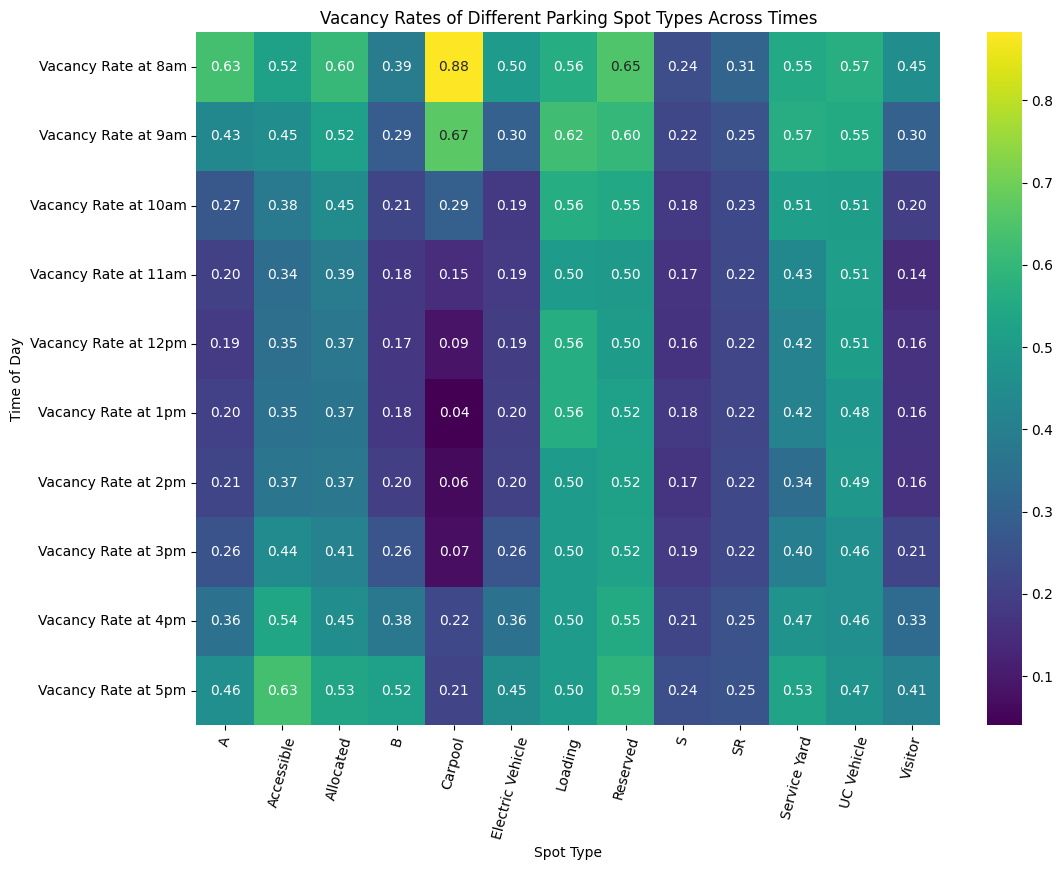

In [ ]:
#heatmap of parking vacancies across times vs. space types
df_filtered_2 = grouped_spots[grouped_spots['SpaceType'].notna() & (grouped_spots['SpaceType'] != '')]

vacancy_data_space = df_filtered_2.groupby('SpaceType')[times_rates].mean().T

#alignment of parkign structure labels is off due to a matplotlib bug
plt.figure(figsize=(12, 9))
sns.heatmap(vacancy_data_space, cmap="viridis", annot=True, fmt=".2f")
plt.title('Vacancy Rates of Different Parking Spot Types Across Times')
plt.xlabel('Spot Type')
plt.ylabel('Time of Day')
plt.xticks(rotation=75)
plt.show()

In [ ]:
df_filtered_2

,SpaceType,Sum of 8am,Sum of 9am,Sum of 10am,Sum of 11am,Sum of 12pm,Sum of 1pm,Sum of 2pm,Sum of 3pm,Sum of 4pm,...,Vacancy Rate at 8am,Vacancy Rate at 9am,Vacancy Rate at 10am,Vacancy Rate at 11am,Vacancy Rate at 12pm,Vacancy Rate at 1pm,Vacancy Rate at 2pm,Vacancy Rate at 3pm,Vacancy Rate at 4pm,Vacancy Rate at 5pm
0,A,4959,3403,2123,1602,1456,1560,1681,2020,2822,...,0.631398,0.433282,0.270308,0.203972,0.185383,0.198625,0.214031,0.257194,0.359307,0.458111
1,Accessible,916,793,674,592,608,623,648,778,946,...,0.521640,0.451595,0.383827,0.337130,0.346241,0.354784,0.369021,0.443052,0.538724,0.629841
2,Allocated,819,700,608,530,507,496,506,555,617,...,0.603537,0.515844,0.448047,0.390567,0.373618,0.365512,0.372881,0.408990,0.454679,0.534267
3,B,7419,5501,4083,3396,3345,3371,3788,5044,7241,...,0.386064,0.286257,0.212468,0.176719,0.174065,0.175418,0.197117,0.262476,0.376802,0.516938
4,Carpool,482,364,159,80,47,22,34,39,122,...,0.882784,0.666667,0.291209,0.146520,0.086081,0.040293,0.062271,0.071429,0.223443,0.210623
5,Electric Vehicle,226,135,84,85,86,90,92,118,163,...,0.497797,0.297357,0.185022,0.187225,0.189427,0.198238,0.202643,0.259912,0.359031,0.447137
6,Loading,9,10,9,8,9,9,8,8,8,...,0.562500,0.625000,0.562500,0.500000,0.562500,0.562500,0.500000,0.500000,0.500000,0.500000
7,Reserved,678,627,569,518,524,538,540,546,576,...,0.651297,0.602305,0.546590,0.497598,0.503362,0.516811,0.518732,0.524496,0.553314,0.585014
8,S,1014,934,766,711,691,771,720,794,902,...,0.237972,0.219197,0.179770,0.166862,0.162169,0.180943,0.168974,0.186341,0.211687,0.243605
9,SR,280,230,205,201,196,197,201,201,229,...,0.309051,0.253863,0.226269,0.221854,0.216336,0.217439,0.221854,0.221854,0.252759,0.254967


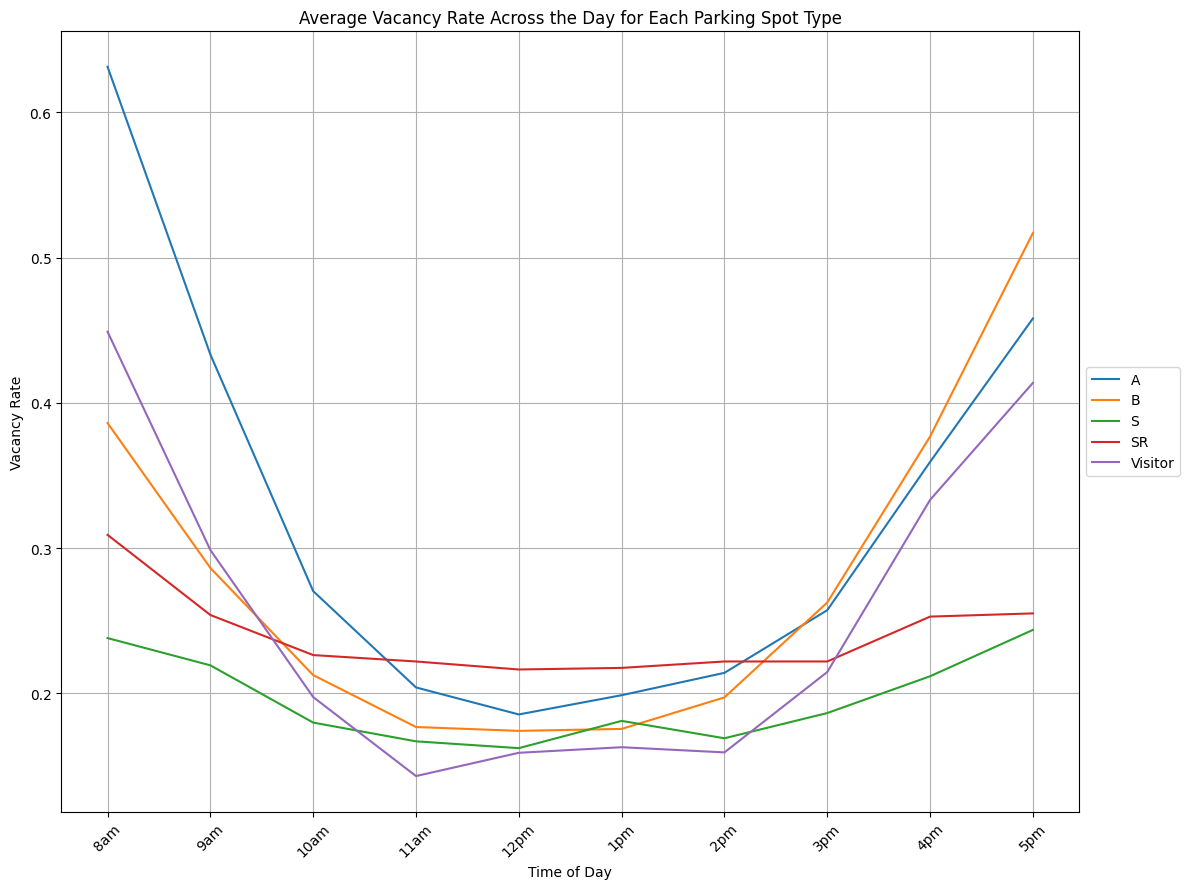

In [ ]:
#linear graph of parking vacancy rates across times vs. parking structures
plt.figure(figsize=(12, 9))
student_structs = ['A', 'B', 'S', 'SR', 'Visitor']

for struct in student_structs:
    df_type2 = grouped_spots[grouped_spots['SpaceType'] == struct]

    vacancy_rates = df_type2[times_rates].mean()
    plt.plot(times, vacancy_rates, label=struct)

plt.title('Average Vacancy Rate Across the Day for Each Parking Spot Type')
plt.xlabel('Time of Day')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Both the grid of rates and the graph of the changing rates over the times we have recorded shows no apparent extraordinary circumstance where any one parking spot is more or less utilized than the others, at least when it comes to parking spots that have some relevance to students — from this, we determine we should test if there is any significant difference in the vacancy rates:

**Question: Is there significant evidence to suggest that among the parking spot types allowed for students (A, B, S, SR, and Visitor), at least one spot type is busier or less busy than the others, or are they all equally busy?**

For this we will perform **Analysis of Variance**, a classical method used to determine if there's any significant difference in a number of categorical data with a similar diagnostic.

- Null Hypothesis($H_0$): All spot types are equally busy.
- Alternate Hypothesis ($H_a$): At least one spot type among A, B, S, SR, and Visitor is busier or less busy than the others.

In [ ]:
vacancy_data_space_transposed = vacancy_data_space.transpose()
student_spot_types = ['A', 'B', 'S', 'SR', 'Visitor']
data_student = vacancy_data_space_transposed.loc[student_spot_types].values

# perform ANOVA test
statistic, p_value = f_oneway(*data_student)

# significance (using a significance level of 0.05)
if p_value < 0.05:
    print('Reject the null hypothesis. There are significant differences among student spot types.')
else:
    print('Fail to reject the null hypothesis. There are no significant differences among student spot types.')

Fail to reject the null hypothesis. There are no significant differences among student spot types.


Based on the analysis of the vacancy rates based on spots that are relevant to student life, there is no significant evidence to suggest differences in occupancy among the parking spot types allowed for students. Since we do not have enough evidence to conclude that at least one spot type is busier or less busy than the others, we keep the null hypothesis that all spot types are equally busy.

# Time

The test that follows may seem redundant once one looks at the graph, and even through common sense, but we still seek to drawn an answer for a question from the data, in keeping with our desire to determine all good data pertaining to the best parking experience on-campus. Again, we begin by looking at the data.

C:\Users\hummins\AppData\Local\Temp\ipykernel_47888\412061287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)
C:\Users\hummins\AppData\Local\Temp\ipykernel_47888\412061287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')


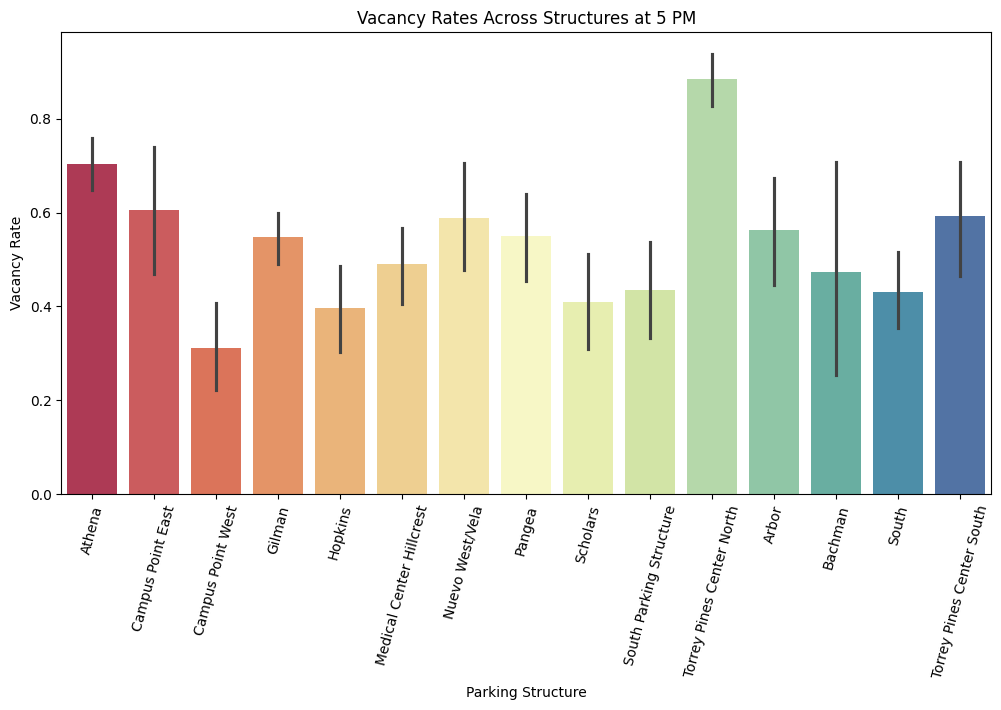

In [ ]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 5pm'] = df_filtered.apply(lambda row: row['Sum of 5pm'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 5pm'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 5pm', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 5 PM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()

C:\Users\20187\AppData\Local\Temp\ipykernel_10776\3744956108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)


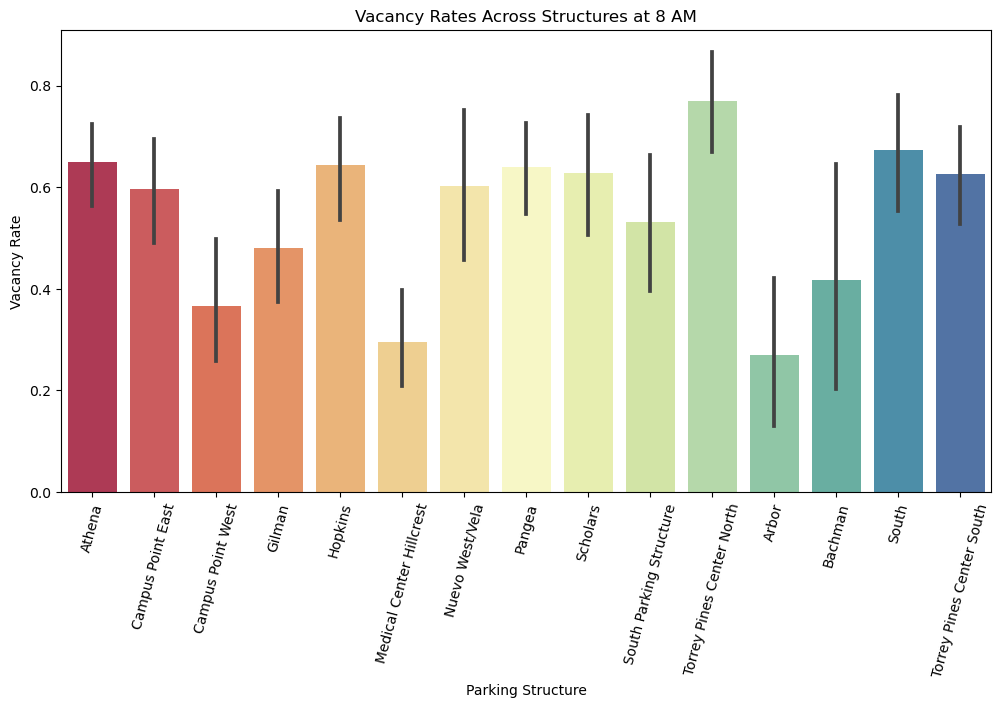

In [ ]:
df_filtered = df[~df['Structure'].str.endswith("Total") & df['Structure'].str.strip().astype(bool)]

df_filtered['Vacancy Rate at 8am'] = df_filtered.apply(lambda row: row['Sum of 8am'] / row['Sum of Inventory'] if row['Sum of Inventory'] > 0 else 0, axis=1)

df_valid = df_filtered[df_filtered['Vacancy Rate at 8am'].notnull()]

plt.figure(figsize=(12, 6))
sns.barplot(x='Structure', y='Vacancy Rate at 8am', data=df_valid, palette='Spectral')
plt.title('Vacancy Rates Across Structures at 8 AM')
plt.xlabel('Parking Structure')
plt.ylabel('Vacancy Rate')
plt.xticks(rotation=75)
plt.show()


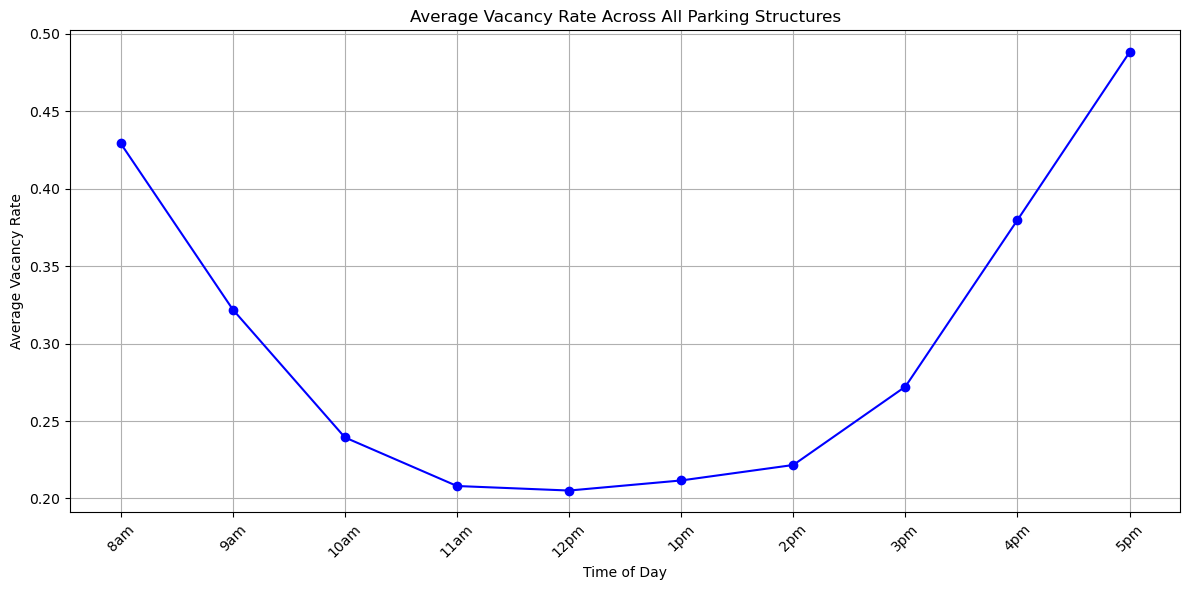

In [ ]:
times = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm']
times_rates = ['Vacancy Rate at ' + time for time in times]

# Calculate the mean vacancy rate across all structures for each time
mean_vacancy_rates = vacancy_data_struct.transpose()[times_rates].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(times, mean_vacancy_rates, marker='o', linestyle='-', color='b')

plt.title('Average Vacancy Rate Across All Parking Structures')
plt.xlabel('Time of Day')
plt.ylabel('Average Vacancy Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Focusing on this last graph; we can see a clear busyness at the middle point of the day (12pm), wherein one may most likely find difficult to get a parking spot in any place on campus (except perhaps up in Torrey Pines Center North). It seems like at 5pm, the parking situations seems most available to have a student come into the parking scene and get a spot, so for the sake of confirming this concretely, we will seek to answer:

**Question: Are there specific time frames where the vacancy rates significantly differ from the vacancy rate at 5 pm?**

For this, we use a similar method to the first test we have done on all parking structures; that is **Multiple One-Sided T-Tests** undergoing the **Benjamini-Hochberg Procedure**.

Null Hypothesis ($H_0$): There is no significant difference in the mean vacancy rates between the given time frame and 5 pm.

Alternative Hypothesis ($H_a$): The mean vacancy rate at the given time frame is significantly higher than the mean vacancy rate at 5 pm.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# transpose the DataFrame for easier processing
vacancy_data_struct_transposed = vacancy_data_struct

# time frame w minimum mean vacancy rate
least_busy_time_frame = 'Vacancy Rate at 5pm'

time_frames = vacancy_data_struct_transposed.index
data = vacancy_data_struct_transposed.values

# perform t-tests for each time frame compared to the least busy time frame
p_values = {}
for time_frame in time_frames:
    if time_frame != least_busy_time_frame:
        _, p_value = ttest_ind(data[time_frames == time_frame][0], data[time_frames == least_busy_time_frame][0], alternative='less')
        p_values[time_frame] = p_value

# convert p-values to a DataFrame for better presentation
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Time Frame', 'P-value'])

# apply Benjamini–Hochberg Procedure
rejected, p_values_corrected, _, _ = smt.multipletests(p_values_df['P-value'], alpha=0.05, method='fdr_bh')

# add corrected p-values and rejection status to the DataFrame
p_values_df['Corrected P-value'] = p_values_corrected
p_values_df['Rejected'] = rejected

# print the results
p_values_df


,Time Frame,P-value,Corrected P-value,Rejected
0,Vacancy Rate at 8am,0.176029,0.176029,False
1,Vacancy Rate at 9am,0.005841,0.007509,True
2,Vacancy Rate at 10am,0.000166,0.000298,True
3,Vacancy Rate at 11am,0.000036,0.000131,True
4,Vacancy Rate at 12pm,0.000034,0.000131,True
5,Vacancy Rate at 1pm,0.000044,0.000131,True
6,Vacancy Rate at 2pm,0.000067,0.000150,True
7,Vacancy Rate at 3pm,0.000539,0.000808,True
8,Vacancy Rate at 4pm,0.029866,0.033599,True


Since the corrected p-value for 8 am is greater than 0.05, we fail to reject the null hypothesis. Therefore, using statistical methods, there is no significant difference in the mean vacancy rates between the vacancy rate at 8 am and the vacancy rate at 5 pm.

However, based on the rejection of the null hypothesis for time frames 9 am to 4 pm, we can infer that the mean vacancy rates at these time frames are significantly lower than for the vacancy rate for 5 pm.

### Alternative Testing Method: Permutation Test with Total Variation Distance (TVD)

The total variation distance (TVD) is a test statistic that describes the **distance between two categorical distributions**.

If $A = [a_1, a_2, ..., a_k]$ and $B = [b_1, b_2, ..., b_k]$ are both categorical distributions, then the TVD between $A$ and $B$ is

$$\text{TVD}(A, B) = \frac{1}{2} \sum_{i = 1}^k \big|a_i - b_i\big|$$

In the context of testing for significant differences in mean vacancy rates between different times of the day, the TVD can be an appropriate measure for a few reasons:
* When we are interested in understanding whether the distribution of vacancy rates at different times of the day are significantly different, TVD provides a direct measure of the discrepancy between these distributions. It effectively quantifies how much one distribution deviates from another across the entire range of observed values.
* TVD is a non-parametric measure, meaning it does not make any assumptions about the underlying distribution of the data (e.g., normality). This is particularly useful in real-world data analysis situations where these assumptions cannot be safely made.
* The value of TVD ranges from 0 to 1, where 0 indicates that the two distributions are identical, and 1 indicates that the distributions are completely different. This makes the interpretation of the results straightforward.
* TVD is sensitive to changes in both the location and shape of the distributions. This is essential when comparing means may not capture the full picture of how two distributions differ, especially if the differences are more nuanced and involve changes in variance, skewness, or kurtosis.

In [ ]:
# Test Code
df_tvd = vacancy_data_struct.copy()

# Data cleaning
df_tvd = df_tvd.reset_index().rename(columns = {'index': 'Time'})

In [ ]:
df_tvd

Structure,Time,Arbor,Athena,Bachman,Campus Point East,Campus Point West,Gilman,Hopkins,Medical Center Hillcrest,Nuevo West/Vela,Pangea,Scholars,South,South Parking Structure,Torrey Pines Center North,Torrey Pines Center South
0,Vacancy Rate at 8am,0.207373,0.575898,0.111810,0.412250,0.303155,0.477157,0.709672,0.209711,0.327438,0.488959,0.480467,0.349194,0.402985,0.802706,0.580472
1,Vacancy Rate at 9am,0.192627,0.446508,0.060019,0.241461,0.188592,0.339803,0.556388,0.190599,0.253824,0.403260,0.341715,0.088642,0.268274,0.753100,0.505365
2,Vacancy Rate at 10am,0.171429,0.344974,0.022749,0.140754,0.125971,0.153479,0.399179,0.165289,0.195985,0.311251,0.243152,0.028012,0.130501,0.735626,0.422747
3,Vacancy Rate at 11am,0.168664,0.312677,0.015489,0.126031,0.070388,0.105405,0.267488,0.157800,0.187859,0.251577,0.183655,0.023408,0.110218,0.728861,0.410944
4,Vacancy Rate at 12pm,0.158525,0.338918,0.020329,0.117197,0.078398,0.100030,0.237152,0.173554,0.179732,0.234490,0.171082,0.023791,0.097972,0.734498,0.410944
5,Vacancy Rate at 1pm,0.163134,0.318530,0.031946,0.136631,0.080583,0.120334,0.243219,0.187758,0.159656,0.226078,0.188145,0.023408,0.124761,0.745209,0.424893
6,Vacancy Rate at 2pm,0.144700,0.310860,0.056631,0.157833,0.099757,0.137653,0.267309,0.211002,0.168260,0.233176,0.197351,0.020721,0.130501,0.757046,0.431330
7,Vacancy Rate at 3pm,0.145622,0.372426,0.137948,0.198469,0.170631,0.186324,0.256602,0.340134,0.206979,0.272608,0.232824,0.076746,0.211634,0.779594,0.494635
8,Vacancy Rate at 4pm,0.395392,0.475979,0.327686,0.308009,0.255583,0.290534,0.326374,0.467459,0.305927,0.330179,0.290076,0.214121,0.312285,0.815107,0.582618
9,Vacancy Rate at 5pm,0.549309,0.598708,0.510649,0.408127,0.315777,0.441027,0.406495,0.563791,0.481836,0.396688,0.341266,0.363392,0.389208,0.877114,0.679185


In [ ]:
time_slot = 'Vacancy Rate at 5pm'
five_pm_data = df_tvd[df_tvd['Time'] == time_slot].iloc[0, 1:]

tvds = {}

for index, row in df_tvd.iterrows():
    time = row['Time']
    if time == time_slot:  # Skip the 5pm row itself
        continue
    tvd = (row.iloc[1:] - five_pm_data).abs().sum() / 2  # TVD calculation
    tvds[time] = tvd

# Convert the dictionary to a DataFrame for better readability
tvd = pd.DataFrame(list(tvds.items()), columns=['Time Slot', 'TVD with 5pm'])
tvd

,Time Slot,TVD with 5pm
0,Vacancy Rate at 8am,1.030340
1,Vacancy Rate at 9am,1.403111
2,Vacancy Rate at 10am,1.865737
3,Vacancy Rate at 11am,2.101055
4,Vacancy Rate at 12pm,2.122979
5,Vacancy Rate at 1pm,2.074143
6,Vacancy Rate at 2pm,1.999220
7,Vacancy Rate at 3pm,1.619697
8,Vacancy Rate at 4pm,0.812621


In [ ]:
def perform_permutation_test(data1, data2, num_permutations=10000):
    observed_diff = np.abs(data1.mean() - data2.mean())
    combined = np.concatenate([data1, data2])

    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_data1 = combined[:len(data1)]
        new_data2 = combined[len(data1):]
        new_diff = np.abs(new_data1.mean() - new_data2.mean())
        if new_diff > observed_diff:
            count += 1
    p_value = count / num_permutations
    return observed_diff, p_value

# Extract 5pm data for comparison
five_pm_mean = df_tvd[df_tvd['Time'] == time_slot].iloc[0, 1:].mean()

# Dictionary to hold the p-values for each time slot
p_values = {}

# Perform the permutation test for each time slot against 5pm
for index, row in df_tvd.iterrows():
    if row['Time'] == time_slot:
        continue  # Skip 5pm as we're comparing against it
    current_mean = row.iloc[1:].mean()  # Mean vacancy rate for the current time slot
    observed_difference = np.abs(current_mean - five_pm_mean)  # Observed difference in means

    # Perform the permutation test
    _, p_value = perform_permutation_test(row.iloc[1:].values, five_pm_data.values)
    p_values[row['Time']] = p_value

# Convert the p-values dictionary to a DataFrame for better readability
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Time Slot', 'P-value'])

# Rejected or Not, With 0.1 Significance Level
p_values_df['Rejected'] = p_values_df['P-value'].apply(lambda x: True if x < 0.1 else False)

p_values_df

,Time Slot,P-value,Rejected
0,Vacancy Rate at 8am,0.3480,False
1,Vacancy Rate at 9am,0.0126,True
2,Vacancy Rate at 10am,0.0001,True
3,Vacancy Rate at 11am,0.0001,True
4,Vacancy Rate at 12pm,0.0001,True
5,Vacancy Rate at 1pm,0.0000,True
6,Vacancy Rate at 2pm,0.0002,True
7,Vacancy Rate at 3pm,0.0009,True
8,Vacancy Rate at 4pm,0.0586,True


Observations & Conclusions
* This permutation test, utilizing TVD as the test statistic, yields results consistent with the prior assessment— it effectively validates the accuracy of the preceding analysis.
* It should be highlighted that the significance level for this test was established at 0.1. Had it been adjusted to 0.05 or lower, the hypothesis stating "There is no difference in Vacancy Rate between 5pm and 4pm" would not be rejected (given the P-value is 0.0586). This would yield a contrary conclusion to the previous test, suggesting that the vacancy rate at 4pm is not significantly busier than what 5pm would be on average.

## Grad vs. Undergrad Parking

One common complaint that many may anecdotally attest to hearing is the excess of B spots compared to S spots; driving around, seeing the B spots empty when searching for an S spot, it's hard not to conclude an over-favoring of grad students to the undergraduate population with regards to parking. While these spots are not completely forbidden for students with an S pass (B spots are open to S permits from 4:00pm-7:30am, and all day weekends) if a car carrying an S permit is found in this spot outside of the determined time, there is a risk of being spotted by a parking manager.

To the effect of determining the validity of an anecdotal assessment, we will rigorously look at it through the lens of stats and data analysis, starting with visualization.

<Figure size 1400x800 with 0 Axes>

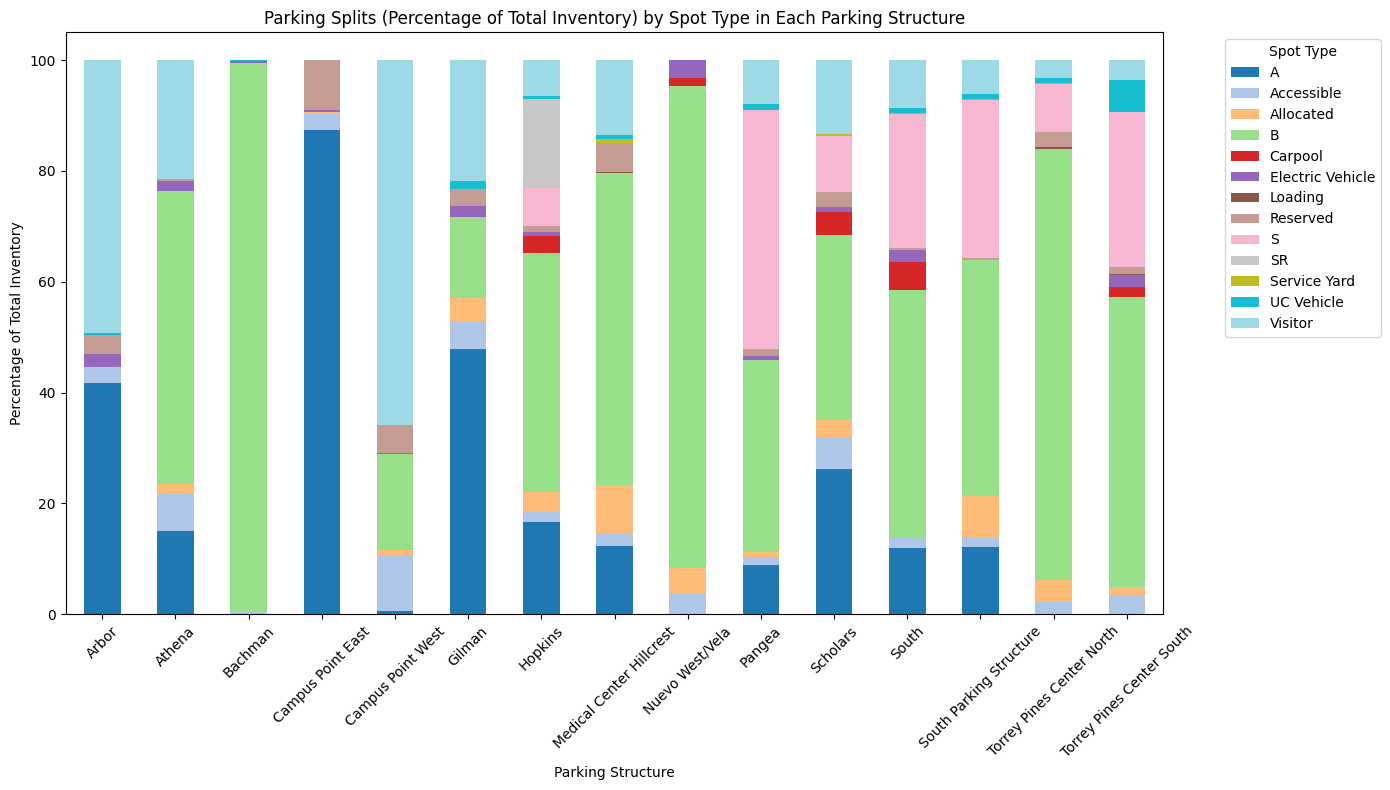

In [ ]:
#graph of parking splits of different spots across different parking structures

# aggregate  data by structure and SpaceType
df_agg = df.groupby(['Structure', 'SpaceType'])['Sum of Inventory'].sum().reset_index()

# calculate the total inventory per structure
total_inventory_by_structure = df_agg.groupby('Structure')['Sum of Inventory'].sum().reset_index().rename(columns={'Sum of Inventory': 'Total Inventory'})

# merge to get the total inventory per structure + each spot's inventory
df_agg = df_agg.merge(total_inventory_by_structure, on='Structure')

# Calculating the percentage of total inventory for each spot type within each structure
df_agg['Percentage of Total'] = (df_agg['Sum of Inventory'] / df_agg['Total Inventory']) * 100

plot_data_real = df_agg.pivot(index='Structure', columns='SpaceType', values='Percentage of Total')
plt.figure(figsize=(14, 8))
plot_data_real.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Parking Splits (Percentage of Total Inventory) by Spot Type in Each Parking Structure')
plt.xlabel('Parking Structure')
plt.ylabel('Percentage of Total Inventory')
plt.legend(title='Spot Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see through the breakdown of the proportion of each parking type on each parking structure, that there is an overwhelming amount of green; the pink spots, which represent S spots, are less prominent, not necessarily present in all structures, but not entirely absent, either. With this we may want to test if the B spots are truly outnumbering the S spots significantly.

**Question: Is there significant evidence to suggest that among the parking structures, there are more spots allowed for Graduate students (B) than ones open for Undergrad students (S)?**

For this, we will be performing **Multiple Z-tests**, which will help compare

- Null Hypothesis($H_0$): There are about the same amount of spots for undergrad and graduate students.
- Alternate Hypothesis ($H_a$): There are more spots for graduate students than undergrad students.

In [ ]:
df_agg

,Structure,SpaceType,Sum of Inventory,Total Inventory,Percentage of Total
0,Arbor,A,452,1085,41.658986
1,Arbor,Accessible,30,1085,2.764977
2,Arbor,Allocated,3,1085,0.276498
3,Arbor,Electric Vehicle,24,1085,2.211982
4,Arbor,Reserved,38,1085,3.502304
...,...,...,...,...,...
116,Torrey Pines Center South,Loading,2,932,0.214592
117,Torrey Pines Center South,Reserved,12,932,1.287554
118,Torrey Pines Center South,S,260,932,27.896996
119,Torrey Pines Center South,UC Vehicle,54,932,5.793991


In [ ]:
grad_df = df_agg[df_agg['SpaceType'] == "B"]
undergrad_df = df_agg[df_agg['SpaceType'] == "S"]

In [ ]:
grad = grad_df
grad

,Structure,SpaceType,Sum of Inventory,Total Inventory,Percentage of Total
10,Athena,B,2617,4954,52.825999
15,Bachman,B,2042,2066,98.838335
26,Campus Point West,B,712,4120,17.281553
33,Gilman,B,492,3349,14.690953
41,Hopkins,B,2412,5604,43.040685
52,Medical Center Hillcrest,B,2178,3872,56.25
60,Nuevo West/Vela,B,1820,2092,86.998088
66,Pangea,B,1316,3804,34.595163
75,Scholars,B,1484,4454,33.318366
84,South,B,1164,2606,44.666155


In [ ]:
undergrad_df

,Structure,SpaceType,Sum of Inventory,Total Inventory,Percentage of Total
45,Hopkins,S,382,5604,6.81656
69,Pangea,S,1640,3804,43.112513
79,Scholars,S,452,4454,10.148181
88,South,S,628,2606,24.098235
97,South Parking Structure,S,745,2613,28.51129
107,Torrey Pines Center North,S,154,1774,8.680947
118,Torrey Pines Center South,S,260,932,27.896996


In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
overlap_structures = grad[grad_df['Structure'].isin(undergrad_df['Structure'])]

results_list = []
# perform z-test for proportions
for structure in overlap_structures['Structure']:
    grad_count = grad_df.loc[grad_df['Structure'] == structure, 'Sum of Inventory'].values[0]
    grad_total = grad_df.loc[grad_df['Structure'] == structure, 'Total Inventory'].values[0]

    undergrad_count = undergrad_df.loc[undergrad_df['Structure'] == structure, 'Sum of Inventory'].values[0]
    undergrad_total = undergrad_df.loc[undergrad_df['Structure'] == structure, 'Total Inventory'].values[0]

    counts = [grad_count, undergrad_count]
    totals = [grad_total, undergrad_total]

    z_stat, p_value = proportions_ztest(counts, totals, alternative='larger')

    conclusion = "Reject the null hypothesis." if p_value < 0.05 else "Fail to reject the null hypothesis."

    results_list.append({'Structure': structure, 'P-value': p_value, 'Conclusion': conclusion})

# results DataFrame
results_df = pd.DataFrame(results_list)
results_df

,Structure,P-value,Conclusion
0,Hopkins,0.000000e+00,Reject the null hypothesis.
1,Pangea,1.000000e+00,Fail to reject the null hypothesis.
2,Scholars,3.547476e-155,Reject the null hypothesis.
3,South,2.240915e-55,Reject the null hypothesis.
4,South Parking Structure,7.640776e-27,Reject the null hypothesis.
5,Torrey Pines Center North,0.000000e+00,Reject the null hypothesis.
6,Torrey Pines Center South,2.284862e-27,Reject the null hypothesis.


**Conclusion:**
For parking structures Hopkins, Scholars, South, South Parking Structure, Torrey Pines Center North, Torrey Pines Center South, there is a statistically significant difference between Gradaute student parking spots and undergraduate student parking spots, and it is likely that there are more grad (B) spots than undergrad (S) spots in those parking structures.

There seems to be only one parking structure in where there are more undergrad spots than grad spots: Pangea. So we decided to test:
- Null Hypothesis($H_0$): In Pangea, there are about the same amount of spots for undergrad and graduate students.
- Alternate Hypothesis ($H_a$): In Pangea, there are more spots for undergraduate students than graduate students.

In [ ]:
grad_count = grad_df.loc[grad_df['Structure'] == "Pangea", 'Sum of Inventory'].values[0]
grad_total = grad_df.loc[grad_df['Structure'] == "Pangea", 'Total Inventory'].values[0]

undergrad_count = undergrad_df.loc[undergrad_df['Structure'] == "Pangea", 'Sum of Inventory'].values[0]
undergrad_total = undergrad_df.loc[undergrad_df['Structure'] == "Pangea", 'Total Inventory'].values[0]

counts = [grad_count, undergrad_count]
totals = [grad_total, undergrad_total]

# now comparing if there is a significantly bigger amount of spots for undergrad than for grad
z_stat, p_value = proportions_ztest(counts, totals, alternative='smaller')

print("Reject the null hypothesis.") if p_value < 0.05 else print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


**Conclusion:**
For the parking structure Pangea, there is a statistically significant difference between Gradaute student parking spots and undergraduate student parking spots, and it is likely that there are more Undergrad (S) spots than Grad (B) spots in those parking structures.

**Question: Is there significant evidence to suggest that among the parking spots allowed for Graduate students(B), there are more spots than ones open for Undergrad students?**

Test: Z-test

- Null Hypothesis($H_0$): There are about the same amount of spots for undergrad and graduate students in UCSD overall.
- Alternate Hypothesis ($H_a$): There are more spots for graduate students than undergrad students in UCSD overall.

In [ ]:
total_grad_count = grad_df['Sum of Inventory'].sum()
total_spots = grad_df['Total Inventory'].sum()
total_undergrad_count = undergrad_df['Sum of Inventory'].sum()

# perform overall z-test for proportions
counts = [total_grad_count, total_undergrad_count]
totals = [total_spots, total_spots]

z_stat, p_value = proportions_ztest(counts, nobs, alternative='larger')

print("\nTest for all Graduate Spots vs. Undergrad Spots at UCSD:")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Conclusion:

Since our p-value is less than 0.05, there is a statistically significant difference between the proportions of graduate and undergrad parking spots across all structures. The rejection of the null hypothesis indicates that, on average, there are more graduate (B) spots than undergrad (S) spots at UCSD.

## Overall Conclusions

Through our data analysis adventure above, we have been able to conclude a number of interesting things: we have a parking structure that seems to be mostly available throughout any particular day (perhaps due to its location) in Torrey Pines Center North; throughout a day, the different parking spots pertaining to students and faculty are not significantly over-used or under-used; if you want to have a good chance at finding a parking spot, you'd have to arrive early or around the time where parking spots begin to open; and there are usually (where both are present) a greater amount of B spots than S spots in all parking structures except Pangea.

Overall, we can see that this fits general knowledge of parking at UC San Diego; the reason as to having a significantly greater amount of B spots on campus is unknown to us, but having a few more Pangea-type parking structures on campus would not be an unwelcome addition. People may even like that, in fact.